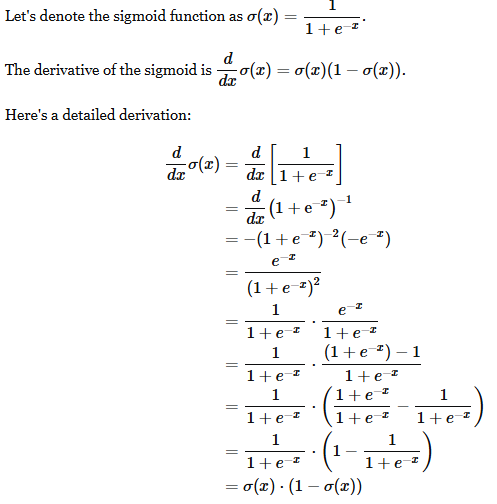

Epoch 0, Error: 0.49943
Epoch 1000, Error: 0.39538
Epoch 2000, Error: 0.26890
Epoch 3000, Error: 0.20873
Epoch 4000, Error: 0.17386
Epoch 5000, Error: 0.15093
Epoch 6000, Error: 0.13459
Epoch 7000, Error: 0.12226
Epoch 8000, Error: 0.11258
Epoch 9000, Error: 0.10474

Output after training:
[[0.05432736]
 [0.89823995]
 [0.89824011]
 [0.13514441]]

Testing the trained model:
Input: [0 0] -> Predicted Output: [0.]
Input: [0 1] -> Predicted Output: [1.]
Input: [1 0] -> Predicted Output: [1.]
Input: [1 1] -> Predicted Output: [0.]


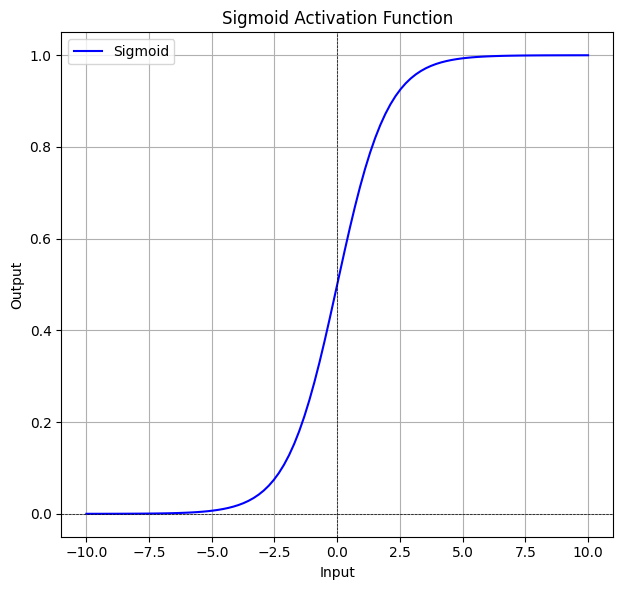

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


# XOR input and output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

np.random.seed(42)

input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))

learning_rate = 0.5
convergence_threshold = 0.01

for epoch in range(10000):
    # Forward propagation
    hidden_layer_input = np.dot(X, hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, output_weights)
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    hidden_weights += X.T.dot(d_hidden_layer) * learning_rate

    total_error = np.mean(np.abs(error))

    if epoch % 1000 == 0 or total_error < convergence_threshold:
        print(f"Epoch {epoch}, Error: {total_error:.5f}")

    if total_error < convergence_threshold:
        print(f"Converged in epoch {epoch}.")
        break

print("\nOutput after training:")
print(predicted_output)

print("\nTesting the trained model:")
for i in range(len(X)):
    hidden_layer_input = np.dot(X[i], hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, output_weights)
    predicted_output = sigmoid(output_layer_input)

    print(f"Input: {X[i]} -> Predicted Output: {predicted_output.round()}")

# Plotting Sigmoid Function and its Derivative
x_values = np.linspace(-10, 10, 100)

# Calculate outputs for sigmoid and its derivative
sigmoid_outputs = sigmoid(x_values)
sigmoid_derivative_outputs = sigmoid_derivative(sigmoid(sigmoid_outputs))  # Correctly calculate derivative

# Create plots
plt.figure(figsize=(12, 6))

# Plot Sigmoid Function
plt.subplot(1, 2, 1)
plt.plot(x_values, sigmoid_outputs, label='Sigmoid', color='blue')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()

# Show plots
plt.tight_layout()
plt.show()